# Hospital Waiting Lists in Northern Ireland
## Cleaning datasets

In [825]:
pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=879ee7dcfce5876475d0cce45d914641bd2a68a41e143dbcf6e3a11efb1177ca
  Stored in directory: c:\users\pat\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [205]:
import pandas as pd;import numpy as np;import matplotlib.pyplot as plt;import seaborn as sns;import plotly.express as px;import folium
#import geopandas as gpd

## Input the GeoJSON & Co-ordinate Data

In [206]:
TBDirectory="https://www.opendatani.gov.uk/dataset/0b04b46c-49af-45d5-b277-91b10937a01b/resource/645f8eef-8813-47a9-bb1e-a4932ada721a/download/trustboundaries.geojson";print("All GeoJSON Imported")

All GeoJSON Imported


In [207]:
Coords = pd.read_csv(r"https://raw.githubusercontent.com/KPBreslin/FinalProject/master/coordinates.csv");TrustMPs=Coords.groupby('Trust').mean();print("All Coordinates Imported")

All Coordinates Imported


## Clean the Emergency and Diagnostics Dataset

In [208]:
EmergWL = pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-ecwt-tables-q1-18-19.csv");EmergWL = EmergWL.replace("Royal Victoria & Royal Victoria (ENT & RAES)","The Royal", inplace=False);EmergWL=EmergWL.fillna(0);EmergWL["Total_sum"] = EmergWL["Total_sum"].str.replace(" ","");EmergWL["Total_sum"] = EmergWL["Total_sum"].str.replace(",","").astype(float);EmergWL["FourAndUnder_sum"] = EmergWL["FourAndUnder_sum"].str.replace(" ","");EmergWL["FourAndUnder_sum"] = EmergWL["FourAndUnder_sum"].str.replace(",","").astype(float);EmergWL["FiveToTwelve_sum"] = EmergWL["FiveToTwelve_sum"].str.replace(",","").astype(float) 
DiagnosticWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-diagnostic-waiting-times-q2-19-20.csv");DiagnosticWT=DiagnosticWT.drop_duplicates();DiagnosticWT.replace(".", 0, inplace=True);DiagnosticWT=DiagnosticWT.fillna(0);DiagnosticWT.drop(DiagnosticWT.columns[DiagnosticWT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);DiagnosticWT=DiagnosticWT.fillna(0);DiagnosticWT=DiagnosticWT.drop([8579,8623,8624,8625,8626]);DiagnosticWT.iloc[:, 5] = DiagnosticWT.iloc[:, 5].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 6] = DiagnosticWT.iloc[:, 6].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 7] = DiagnosticWT.iloc[:, 7].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 8] = DiagnosticWT.iloc[:, 8].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 10] = DiagnosticWT.iloc[:, 10].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 11] = DiagnosticWT.iloc[:, 11].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 12] = DiagnosticWT.iloc[:, 12].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 13] = DiagnosticWT.iloc[:, 13].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 14] = DiagnosticWT.iloc[:, 14].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 15] = DiagnosticWT.iloc[:, 15].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 16] = DiagnosticWT.iloc[:, 16].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 17] = DiagnosticWT.iloc[:, 17].str.replace(",","").astype(float);DiagnosticWT.fillna(0);DiagnosticRTT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-diagnostic-reporting-turnaround-q2-19-20.csv");DiagnosticRTT=DiagnosticRTT.drop_duplicates();DiagnosticRTT.replace(".", 0, inplace=True);DiagnosticRTT=DiagnosticRTT.fillna(0);DiagnosticRTT=DiagnosticRTT.drop([9947]);DiagnosticRTT.drop(DiagnosticRTT.columns[DiagnosticRTT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);DiagnosticRTT["0-2 days"] = DiagnosticRTT["0-2 days"].str.replace(",","").astype(int);DiagnosticRTT["3-7 days"] = DiagnosticRTT["3-7 days"].str.replace(",","").astype(int);DiagnosticRTT["8-14 days"] = DiagnosticRTT["8-14 days"].str.replace(",","").astype(int);DiagnosticRTT["15-21 days"] = DiagnosticRTT["15-21 days"].str.replace(",","").astype(int);DiagnosticRTT["22-28 days"] = DiagnosticRTT["22-28 days"].str.replace(",","").astype(int);DiagnosticRTT[">28 days	"] = DiagnosticRTT[">28 days"].str.replace(",","").astype(int);DiagnosticRTT["Total"] = DiagnosticRTT["Total"].str.replace(",","").astype(int)
#DiagnosticRTT.drop(DiagnosticRTT.rows[DiagnosticRTT.rows.str.contains('the ending',case = False)],axis = 1, inplace = True)
print("All Emergency and Diagnostics Data Imported")

All Emergency and Diagnostics Data Imported


In [201]:
matplotlib inline

In [203]:
#([6134,6135,6136,6137,6138])
#

sns.set()
#%matplotlib inline

DWTbyRWT=DiagnosticWT.groupby("Recommended Waiting Time")
DWTbyRWT.describe()


0 - 6 weeks                                           \
                               count        mean         std  min   25%   50%   
Recommended Waiting Time                                                        
13 week                       3252.0   92.981550  150.169762  0.0   2.0  12.0   
9 week                        5327.0  304.076779  528.187473  0.0  28.0  98.0   

                                        > 6 - 9 weeks             ...  \
                            75%     max         count       mean  ...   
Recommended Waiting Time                                          ...   
13 week                   128.0   895.0        3252.0  28.878844  ...   
9 week                    330.0  3761.0        5327.0  75.692698  ...   

                         > 78 weeks           Total                           \
                                75%     max   count        mean          std   
Recommended Waiting Time                                                       
13 week                        5.25   146.0  3252.0  215.572263   348.471604   
9 week                         0.00  2428.0  5327.0  550.779238  1098.208688   

                                                             
                          min   25%    50%     75%      max  
Recommended Waiting Time                                     
13 week                   1.0   4.0   25.0  296.25   2452.0  
9 week                    1.0  39.0  142.0  481.50  10466.0  

[2 rows x 104 columns]

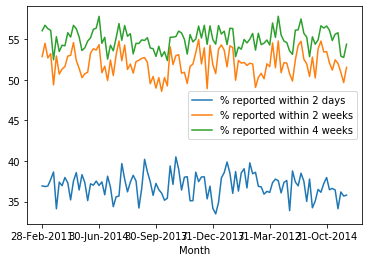

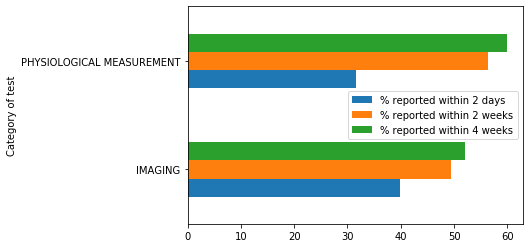

In [56]:

P=DiagnosticRTT.groupby('Month').mean()
P.plot.line()
Q=DiagnosticRTT.groupby('Category of test').mean()
Q.plot.barh()

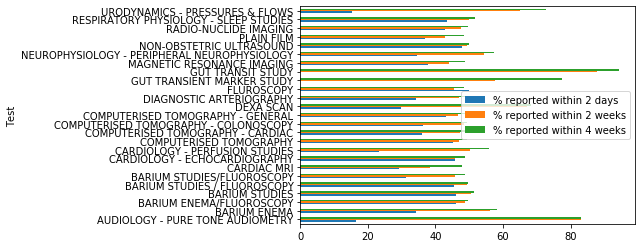

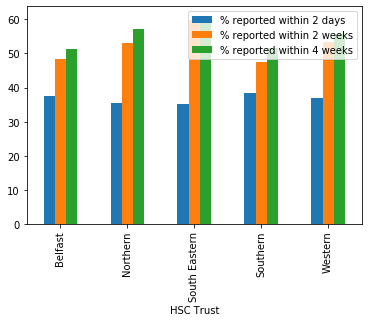

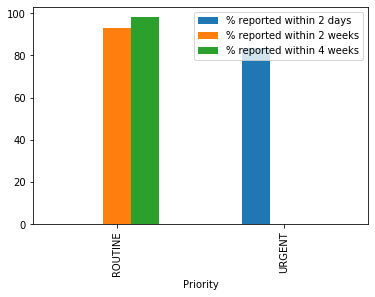

In [46]:
#DiagnosticRTT.head()

R=DiagnosticRTT.groupby('Test').mean()
R.plot.barh()
S=DiagnosticRTT.groupby('HSC Trust').mean()
S.plot.bar()
T=DiagnosticRTT.groupby('Priority').mean()
T.plot.bar()

In [12]:

X=EmergWL.groupby('New_Hospital')



#.describe()
#EmergWL = EmergWL.replace("Royal Victoria & Royal Victoria (ENT & RAES)",
#                          "The Royal", 
#                          inplace=True)
#EmergWL.describe()

## Clean the Inpatient and Outpatient lists

In [75]:
FirstCOPWL = pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-outpatients-q2-19-20.csv")
#Remove footer data
FirstCOPWL=FirstCOPWL.drop([6134,6135,6136,6137,6138])
FirstCOPWL.replace("--", 0, inplace=True)
#FirstCOPWL["0 - 6 weeks"] = pd.to_numeric(FirstCOPWL["0 - 6 weeks"])


CentralCOPWL = pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-outpatients-centralisation-q2-19-20.csv")
#Remove footer data
CentralCOPWL=CentralCOPWL.drop([66,67,68,69,70,71]),CentralCOPWL=CentralCOPWL.dropna(axis='columns')
OrigCCOPWL=CentralCOPWL
CentralCOPWL.replace("--", 0, inplace=True)


CentralCOPWL["Total Waiting "] = CentralCOPWL["Total Waiting "].str.replace(",","").astype(float)
#CentralCOPWL[" > 18 weeks "] = CentralCOPWL[" > 18 weeks "].astype(float)
CentralCOPWL['Below 18 weeks']= CentralCOPWL.iloc[:, 4:9].sum(axis=1)
#CentralCOPWL['Below 18 weeksB']= CentralCOPWL.iloc[:, 4:9].sum(axis=1)

CentralCOPWL.drop(CentralCOPWL.columns[[4,5,6,7,8,9,10,11]], axis = 1, inplace = True) 
#CentralCOPWL['Above 18 weeks']= CentralCOPWL.iloc[:,-2:-1].subtract(axis=1)
#CentralCOPWL.drop(columns =["Treatment Month"], inplace = True) 
CentralCOPWL['Above 18 weeks'] = CentralCOPWL['Total Waiting '].sub(CentralCOPWL['Below 18 weeks'], axis = 0) 

ICATSWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-icats-q2-19-20.csv")
ICATSWLA=ICATSWL.drop_duplicates();ICATSWL=ICATSWLA.drop([689,691,692,693,694]);ICATSWL=ICATSWL.dropna(axis='columns');ICATSWL=ICATSWL.fillna(0)
ICATSWL.replace("--", 0, inplace=True)
#Remove footer data

DayCaseIPWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-day-cases-q2-19-20.csv")
#Remove footer data
DayCaseIPWL=DayCaseIPWL.drop([4399,4400,4401,4402,4403,4404,4405,4406,4407,4408,4409,4410,4411,4412]);DayCaseIPWL.drop(DayCaseIPWL.columns[DayCaseIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);DayCaseIPWL.replace("--", 0, inplace=True);DayCaseIPWL.fillna(0)
#TotalIPWL.drop(TotalIPWL.columns[TotalIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


AdminIPWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-inpatients-q2-19-20.csv")
#Remove footer data
AdminIPWL=AdminIPWL.drop([2994,2995,2996,2997,2998,2999,3000,3001,3002,3003,3004,3005]);AdminIPWL=AdminIPWL.dropna(axis='columns');AdminIPWL=AdminIPWL.fillna(0);AdminIPWL.drop(AdminIPWL.columns[AdminIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

AdminIPWL["0 - 6 weeks"] = AdminIPWL["Total"].str.replace(",","").astype(int);AdminIPWL["> 6 - 13 weeks"] = AdminIPWL["> 6 - 13 weeks"].str.replace(",","").astype(int);AdminIPWL["> 13 - 21 weeks"] = AdminIPWL["> 13 - 21 weeks"].str.replace(",","").astype(int);AdminIPWL["> 21 - 26 weeks"] = AdminIPWL["> 21 - 26 weeks"].str.replace(",","").astype(int);AdminIPWL["Total"] = AdminIPWL["Total"].str.replace(",","").astype(int)

TotalIPWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-total-waiting-q2-19-20.csv");TotalIPWL=TotalIPWL.drop([4550,4551,4552,4553,4554,4555,4556,4557,4558,4559,4560,4561]);TotalIPWL=TotalIPWL.fillna(0);TotalIPWL.drop(TotalIPWL.columns[TotalIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);TotalIPWL["Total"] = TotalIPWL["Total"].str.replace(",","").astype(int)
print("All In and Out Patient Data Imported")

All In and Out Patient Data Imported


## Clean the Cancer Waiting Lists

In [209]:
HSCT31DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-31-day-wait-by-trust-q1-19-20.csv")
HSCT31DCWT=HSCT31DCWT.dropna(axis='columns')
new=HSCT31DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
HSCT31DCWT["Treatment_Month"]= new[0] ;HSCT31DCWT["Treatment Year"]= '20' + new[1]
HSCT31DCWT.drop(columns =["Treatment Month"], inplace = True) 
HSCT31DCWT = HSCT31DCWT[['Treatment_Month', 'Treatment Year', 'HSC Trust', '% treated within 31 days']]


HSCT62DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-62-day-wait-by-trust-q1-19-20.csv")
#remove NA columns
HSCT62DCWT=HSCT62DCWT.dropna(axis='columns')
new=HSCT62DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
HSCT62DCWT["Treatment_Month"]= new[0] 
HSCT62DCWT["Treatment Year"]= '20' + new[1]
HSCT62DCWT.drop(columns =["Treatment Month"], inplace = True) 
HSCT62DCWT = HSCT62DCWT[['Treatment_Month', 'Treatment Year', 'HSC Trust', '% treated within 62 days']]


TS31DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-31-day-wait-by-tumour-q1-19-20.csv")  
TS31DCWT.drop(TS31DCWT.columns[TS31DCWT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
TS31DCWT.replace("--", 
           0, 
           inplace=True)
TS31DCWT.replace("-", 
           0.0, 
           inplace=True)
#TS31DCWT=TS31DCWT.dropna(axis='columns')
new=TS31DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
TS31DCWT["Treatment_Month"]= new[0] 
TS31DCWT["Treatment Year"]= '20' + new[1]
TS31DCWT.drop(columns =["Treatment Month"], inplace = True) 
TS31DCWT= TS31DCWT[['Treatment_Month', 'Treatment Year', 'Tumour Site', '% treated within 31 days']]

TS62DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-62-day-wait-by-tumour-q1-19-20.csv")
TS62DCWT.drop(TS62DCWT.columns[TS62DCWT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
TS62DCWT.replace("--", 
           0, 
           inplace=True)
TS62DCWT.replace("-", 
           0, 
           inplace=True)
new=TS62DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
TS62DCWT["Treatment_Month"]= new[0] 
TS62DCWT["Treatment Year"]= '20' + new[1]
TS62DCWT.drop(columns =["Treatment Month"], inplace = True) 
TS62DCWT= TS62DCWT[['Treatment_Month', 'Treatment Year', 'Tumour Site', '% treated within 62 days']]
#TS62DCWT=TS62DCWT.dropna(axis='columns')


CWT14D=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-14-day-wait-q1-19-20.csv")
CWT14D=CWT14D.dropna(axis='columns')
new2=CWT14D["Month Seen"].str.split("-", n = 1, expand = True) 
CWT14D["Month_Seen"]= new[0] 
CWT14D["Year Seen"]= '20' + new[1]
CWT14D.drop(columns =["Month Seen"], inplace = True) 
CWT14D = CWT14D[['Month_Seen', 'Year Seen', 'HSC Trust', '% seen within 14 days']]


print("All Cancer Data Imported")

All Cancer Data Imported


,Month_Seen,Year Seen,HSC Trust,% seen within 14 days
0,Dec,2008,Belfast,100.0
1,Dec,2008,Northern,100.0
2,Dec,2008,South Eastern,100.0
3,Dec,2008,Southern,100.0
4,Dec,2008,Western,100.0


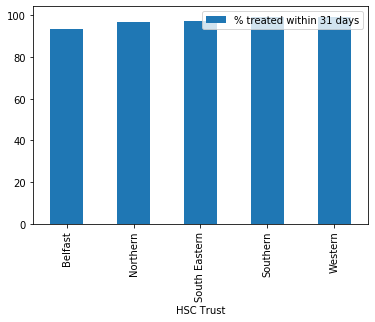

In [89]:
HSCT31DCWT.head()
test=HSCT31DCWT.groupby(["HSC Trust"]).mean()
test.plot.bar()

CWT14D.head()
#TwentySixtoMax = DayCaseIPWL['> 26-30 weeks'] + DayCaseIPWL['>26-52 weeks'] + DayCaseIPWL['>30-36 weeks'] + DayCaseIPWL['> 26 - 36 weeks']
#Max=DayCaseIPWL['> 26 weeks'] + DayCaseIPWL['>52 weeks'] + DayCaseIPWL['> 36 weeks'] 


#DayCaseIPWL['Max'] = DayCaseIPWL.loc[:,'> 26 weeks'].add(DayCaseIPWL.loc[:,'> 36 weeks'])
#DayCaseIPWL['Max'] = DayCaseIPWL.loc[:,['> 26 weeks','> 36 weeks','>52 weeks']].sum(axis=1)
#DayCaseIPWL['Max']  = DayCaseIPWL.apply(lambda x: x['> 26 weeks'] +x['> 36 weeks'], axis=1)
#DayCaseIPWL.describe()
#df.loc[:,'> 26-30 weeks'] = df.loc[:,'> 26-30 weeks'] = df.loc[:,'budget'].add(df.loc[:,'actual'])
#DayCaseIPWL=DayCaseIPWL.dropna(axis='columns')
#DayCaseIPWL=DayCaseIPWL.dropna(axis='columns')
#new3=DayCaseIPWL["Quarter Ending"].str.split("-", n = 1, expand = True) 
#DayCaseIPWL["QE Day"]= new2[0] 
#DayCaseIPWL["QE Month"]= new2[1]
#DayCaseIPWL["QE Year"]= new2[2]
#DayCaseIPWL.drop(columns =["Quarter Ending"], inplace = True) 
#DayCaseIPWL = DayCaseIPWL[['QE Month','QE Year', 'HSC Trust','Specialty','Programme of Care','0 - 6 weeks','6 - 13 weeks','> 13 - 21 weeks','> 21 - 26 weeks','Total']]


In [16]:
new2=TS62DCWT[['Tumour Site', '% treated within 62 days']]
new2[pd.to_numeric(new2['% treated within 62 days'], errors='coerce').notnull()]
new2
C=new2.groupby(['Tumour Site'])



## Graphical Experiments

In [17]:
TS31DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-31-day-wait-by-tumour-q1-19-20.csv")  
TS31DCWT.drop(TS31DCWT.columns[TS31DCWT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
TS31DCWT.replace("--", 
           0, 
           inplace=True)
TS31DCWT.replace("-", 
           0.0, 
           inplace=True)
#TS31DCWT=TS31DCWT.dropna(axis='columns')
new=TS31DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
TS31DCWT["Treatment_Month"]= new[0] 
TS31DCWT["Treatment Year"]= '20' + new[1]
TS31DCWT.drop(columns =["Treatment Month"], inplace = True) 
TS31DCWT= TS31DCWT[['Treatment_Month', 'Treatment Year', 'Tumour Site', '% treated within 31 days']]
#A=TS31DCWT.groupby(['% treated within 31 days'])
#A.describe()
A=TS31DCWT.groupby(['Treatment Year'])
A


Graphs of the Cancer waiting times by Trust


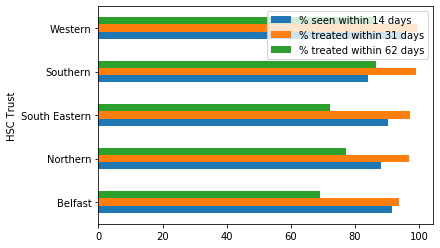

In [47]:
#CANCER WAITING TIMES
A=HSCT31DCWT.groupby(['HSC Trust']).mean()
B=HSCT62DCWT.groupby(['HSC Trust']).mean()
C=CWT14D.groupby(['HSC Trust']).mean()
#A.plot.bar()
#B.plot.bar()
join = pd.concat([C,A,B], axis=1, join='inner')
join.plot.barh()
print("Graphs of the Cancer waiting times by Trust")

Graphs of the Cancer waiting times by Treatment Time


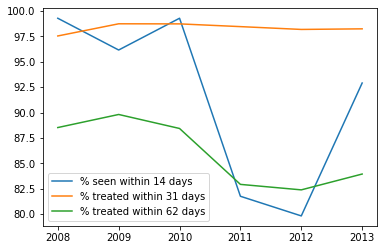

In [19]:
#CANCER WAITING TIMES
#df.month = pd.to_datetime(df.month, unit='s')
['Treatment Month']
A=HSCT31DCWT.groupby(['Treatment Year']).mean()
B=HSCT62DCWT.groupby(['Treatment Year']).mean()
C=CWT14D.groupby(['Year Seen']).mean()
D = pd.concat([C,A,B], axis=1, join='inner')
D.plot.line()
print("Graphs of the Cancer waiting times by Treatment Time")



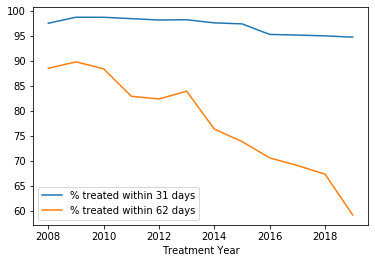

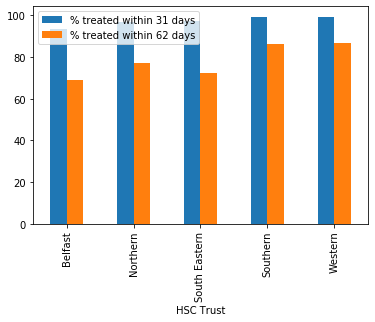

In [33]:
#HSCT31DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-31-day-wait-by-trust-q1-19-20.csv")
#HSCT31DCWT=HSCT31DCWT.dropna(axis='columns')
#new=HSCT31DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
#HSCT31DCWT["Treatment_Month"]= new[0] 
#HSCT31DCWT["Treatment Year"]= '20' + new[1]
#HSCT31DCWT.drop(columns =["Treatment Month"], inplace = True) 
#HSCT31DCWT = HSCT31DCWT[['Treatment_Month', 'Treatment Year', 'HSC Trust', '% treated within 31 days']]

E=HSCT31DCWT.groupby(['Treatment Year']).mean()
#E.plot.line()
F=HSCT31DCWT.groupby(['HSC Trust']).mean()
#F.plot.bar()
G=HSCT62DCWT.groupby(['Treatment Year']).mean()
#G.plot.line()
H=HSCT62DCWT.groupby(['HSC Trust']).mean()
#H.plot.bar()

J = pd.concat([E,G], axis=1, join='inner')
J.plot.line()

K = pd.concat([F,H], axis=1, join='inner')
K.plot.bar()

In [34]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [204]:
#import folium
#TrustMap = folium.Map(location=[54.6, -7.7], tiles = "Stamen Terrain", zoom_start=8.45)
#TrustMap

In [23]:
import plotly.express as px

#df = px.data.election()
#geojson = px.data.election_geojson()

#fig = px.choropleth(df, geojson=geojson, color="Bergeron",
#                    locations="district", featureidkey="properties.district",
#                    projection="mercator"
#                   )
#fig.update_geos(fitbounds="locations", visible=False)
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()

## Calculate Percentages

In [24]:
import matplotlib.pyplot as plt
import pandas as pd



#CentralCOPWL
#OrigCCOPWL.head()
E=CentralCOPWL.groupby(['HSC Trust']).sum()

E.drop(E.columns[[0]], axis = 1, inplace = True)
#E.groupby(['state','gender']).size().unstack().plot(kind='bar',stacked=True)
#plt.show()
#Slim_E= df2.iloc[:, -1:-2].subtract(axis=1)

#F=CentralCOPWL.groupby(['Specialty']).mean()
#F.head()
#plot = E.plot.pie(subplots=True, figsize=(6, 3))

#df2['Over 18 weeks']= df2.iloc[:, -1:-2].subtract(axis=1)
#CentralCOPWL.describe()
#FirstCOPWL


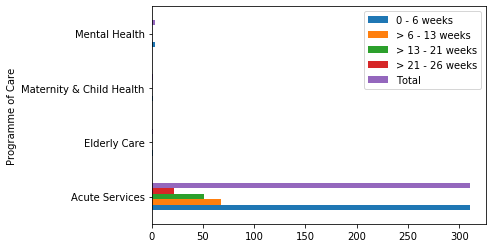

In [74]:
AdminIPWL.head()
G=AdminIPWL.groupby(['Programme of Care']).mean()
G.plot.barh()

In [76]:
TotalIPWL.head()

,Quarter Ending,HSCTrust,Specialty,Programme of Care,0 - 6 weeks,> 6 - 13 weeks,> 13 - 21 weeks,> 21 - 26 weeks,> 26 weeks,>26-52 weeks,>52 weeks,> 26-30 weeks,> 30 weeks,>30-36 weeks,> 26 - 36 weeks,> 36 weeks,Total
0,30-Jun-2007,Belfast,General Surgery,Acute Services,748,552,371,37,0,0,0,--,--,--,--,--,1708
1,30-Jun-2007,Belfast,Urology,Acute Services,661,434,224,17,0,0,0,--,--,--,--,--,1336
2,30-Jun-2007,Belfast,T & O Surgery,Acute Services,747,"1,043",677,147,0,0,0,--,--,--,--,--,2614
3,30-Jun-2007,Belfast,ENT,Acute Services,431,628,329,10,0,0,0,--,--,--,--,--,1398
4,30-Jun-2007,Belfast,Ophthalmology,Acute Services,"1,026",956,483,25,0,0,0,--,--,--,--,--,2490


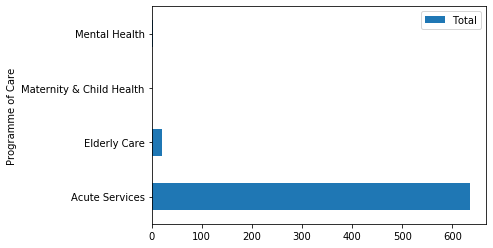

In [81]:
TotalIPWL.tail()
#F=TotalIPWL.groupby(['HSCTrust']).mean()
#F.plot.barh()
F=TotalIPWL.groupby(['Programme of Care']).mean()
F.plot.barh()